# Data Preparation 

In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv("C:\\Users\\90821\\Downloads\\loan.csv")
data = data.dropna()
len(data)

96733

In [18]:
data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status
0,2500,36,13.56,C,10+ years,RENT,55000.0,Current
1,30000,60,18.94,D,10+ years,MORTGAGE,90000.0,Current
2,5000,36,17.97,D,6 years,MORTGAGE,59280.0,Current
3,4000,36,18.94,D,10+ years,MORTGAGE,92000.0,Current
4,30000,60,16.14,C,10+ years,MORTGAGE,57250.0,Current


In [19]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status'],
      dtype='object')

In [20]:
gradeLoanStatus = pd.get_dummies(data['loan_status'])
data = pd.concat([data, gradeLoanStatus],axis=1)
data.drop(['loan_status'],axis=1,inplace=True)

In [21]:
gradeDummy = pd.get_dummies(data['grade'])
data = pd.concat([data, gradeDummy],axis=1)
data.drop(['grade'],axis=1,inplace=True)

In [22]:
gradeHomeown = pd.get_dummies(data['home_ownership'])
data = pd.concat([data, gradeHomeown],axis=1)
data.drop(['home_ownership'],axis=1,inplace=True)

In [23]:
gradeEmpLen = pd.get_dummies(data['emp_length'])
data = pd.concat([data, gradeEmpLen],axis=1)
data.drop(['emp_length'],axis=1,inplace=True)

In [24]:
data.head()

,loan_amnt,term,int_rate,annual_inc,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),...,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,2500,36,13.56,55000.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,30000,60,18.94,90000.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,5000,36,17.97,59280.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4000,36,18.94,92000.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,30000,60,16.14,57250.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Predicting loan status with Random Forest 

In [25]:
labels = data[['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)']]
features = data.drop(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)'], axis = 1)
features = np.array(features)
labels = np.array(labels)

In [26]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 10)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(train_features, train_labels);

In [37]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2))
error = sqrt(mean_squared_error(test_labels,predictions))
print(error)

Mean Absolute Error: 0.02
0.11046329800665182


# Predicting loan status with K nearest neighbours

In [29]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 10)

In [30]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
rmse_val = []

for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_features , train_labels)  
    pred=model.predict(test_features) 
    error = sqrt(mean_squared_error(test_labels,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.14386927726571874
RMSE value for k=  2 is: 0.12637936392103793
RMSE value for k=  3 is: 0.11940305531647247
RMSE value for k=  4 is: 0.11546756694747683
RMSE value for k=  5 is: 0.11319757818464275
RMSE value for k=  6 is: 0.1117634385064909
RMSE value for k=  7 is: 0.11060369439125328
RMSE value for k=  8 is: 0.10966970936757427
RMSE value for k=  9 is: 0.1090343737848569
RMSE value for k=  10 is: 0.10847712629192556
RMSE value for k=  11 is: 0.10805421481434112
RMSE value for k=  12 is: 0.10776881135619316
RMSE value for k=  13 is: 0.10747384581514521
RMSE value for k=  14 is: 0.10726694705540435
RMSE value for k=  15 is: 0.10708304710578333
RMSE value for k=  16 is: 0.10693750456079845
RMSE value for k=  17 is: 0.10680244189081332
RMSE value for k=  18 is: 0.1066299373188847
RMSE value for k=  19 is: 0.10649585925266852
RMSE value for k=  20 is: 0.10636988851040409
RMSE value for k=  21 is: 0.10625549472375773
RMSE value for k=  22 is: 0.10611414570200928


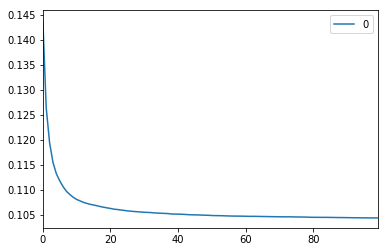

In [32]:
curve = pd.DataFrame(rmse_val) 
curve.plot()

In [34]:
model = neighbors.KNeighborsRegressor(n_neighbors = 100)
model.fit(train_features , train_labels)  
pred = model.predict(test_features) 
pred = pd.DataFrame(pred)
pred.head()

,0,1,2,3,4,5
0,0.98,0.02,0.00,0.00,0.0,0.0
1,0.98,0.01,0.00,0.01,0.0,0.0
2,0.94,0.05,0.01,0.00,0.0,0.0
3,0.98,0.02,0.00,0.00,0.0,0.0
4,0.99,0.01,0.00,0.00,0.0,0.0


In [35]:
error = sqrt(mean_squared_error(test_labels,pred))
error

0.10436238860478933

#### We observe that the K nearest neighbors method has been marginally more accurate for the classification of 'loan status'. While the difference in accuracy, as measured by the RMSE values, does not seem significant it is enough for the KNN model to be chosen for this data set.